# Text data mining

* dataset used for this exercise can be downloaded from [here](https://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups)

This example will rely mostly on R libraries. We will start by clearing any existing variables from memory and import `tm` text mining package.

In [1]:
rm(list=ls())
library(tm)

Loading required package: NLP


Next, lets load recursively all documents from a directory into memory, to create a corpus, or a collection of documents. 

In [2]:
src <- "/home/jovyan/data/SDM/20_newsgroups/"
docs <- VCorpus(DirSource(directory=src, encoding='utf-8', pattern='^.*3$', recursive = TRUE))

> "Load everything into memory and fiter out by copy" is the R way. Not ideal when dealing with large amount of data, or if you are in a streaming setting. But it's good enough for a simple example.

Proceed by pre-processing the documents. Lowercase and uppercase words will be treated as distinct words if left untreated. Likewise, stop words, punctuation marks, syntax like HTTP tags, etc., can have a significant impact of final results.

In [3]:
docs <- tm_map(docs, content_transformer(tolower))   
docs <- tm_map(docs, removeNumbers)   
docs <- tm_map(docs, removeWords, stopwords("english"))   
docs <- tm_map(docs, removePunctuation)   
docs <- tm_map(docs, stemDocument)

This example is based on usual use case of text data mining in academia, which is natural language processing. Note that most of the core mining steps remain the same when mining through non human language documents, such as log data. 

In [4]:
head(summary(docs))

      Length Class             Mode
51123 2      PlainTextDocument list
51133 2      PlainTextDocument list
51143 2      PlainTextDocument list
51153 2      PlainTextDocument list
51163 2      PlainTextDocument list
51173 2      PlainTextDocument list

Now create a bag of words, or a document term matrix.

In [5]:
dtm <- DocumentTermMatrix(docs, control=list(wordLengths=c(3,40)))
partial <- as.matrix(dtm)[c(1:5), c(1:5)]
partial

,aaa,aaaa,aaaahhh,aabengaltigrorg,aac
51123,0,0,0,0,0
51133,0,0,0,0,0
51143,0,0,0,0,0
51153,0,0,0,0,0
51163,0,0,0,0,0


In [6]:
nrow(dtm)
head(rownames(dtm))

[1] 2007

[1] "51123" "51133" "51143" "51153" "51163" "51173"

In [7]:
ncol(dtm)
head(colnames(dtm))

[1] 36161

[1] "aaa"                    "aaaa"                   "aaaahhh"               
[4] "aabengaltigrorg"        "aac"                    "aacapricorntaiselcomtw"

Document term matrices tend to be sparse, or populated with vectors where most vectors are filled with zeroes. These infrequent terms can be culled from our total to reduce computational overhead while also producing more meaningful results.

In [8]:
dtms <- removeSparseTerms(dtm, 0.95)
partial <- as.matrix(dtms)
partial

,abl,accept,access,actual,address,advanc,ago,agre,allow,almost,⋯,work,world,write,wrong,wrote,xnewsread,xref,year,yes,yet
51123,0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
51133,0,5,0,0,0,0,0,0,0,0,⋯,1,0,1,0,0,0,0,0,0,0
51143,0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
51153,0,2,0,1,0,0,0,1,0,0,⋯,0,1,1,2,0,0,0,0,1,0
51163,0,0,0,0,0,0,0,0,0,0,⋯,0,1,2,0,0,0,0,0,1,0
51173,0,0,0,0,0,0,1,0,0,0,⋯,0,1,1,0,0,0,0,0,0,0
51183,0,1,0,0,0,0,0,1,0,0,⋯,0,0,3,0,1,0,0,1,2,0
51193,0,0,0,1,0,0,0,0,0,1,⋯,0,0,3,0,0,0,0,0,0,0
51203,0,0,0,0,0,0,0,0,0,0,⋯,0,0,4,4,0,0,0,0,0,0
51213,0,0,0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,0,0


In [9]:
nrow(dtms)
ncol(dtms)

[1] 2007

[1] 383

Our original dataset of 36161 words was reduced to 383 words, thus reducing the dimensionality of our data set.

Next, create a distance matrix between documents. Note that I applied transpose because otherwise the cosine funciton from `lsa` package would be applied on words as opposed to documents. However, we are more interested in comparing document content similarity, as opposed to word usage.

* https://github.com/computationalstylistics/stylo/blob/master/R/dist.cosine.R

In [17]:
cosDist <- function(x) {
    y = 1 - ( x %*% t(x) / (sqrt(rowSums(x^2) %*% t(rowSums(x^2)))) )
    return(y)
}

In [27]:
#library(lsa)
# 100 usecs
#system.time(distances <- cosine(as.matrix(t(dtms))))

# 5 usecs
system.time(
    distances <- cosDist(as.matrix(dtms))
)
distances[c(1:10),]

   user  system elapsed 
  5.123   0.000   5.137 

,51123,51133,51143,51153,51163,51173,51183,51193,51203,51213,⋯,84343,84353,84363,84403,84413,84423,84433,84443,84553,84563
51123,0.0000000,0.7214758,0.5332320,0.8788035,0.6291309,0.6948920,0.6984887,0.7214236,0.6435832,0.6414314,⋯,0.8348554,0.7247011,0.6815608,0.7171573,0.4777670,0.6291309,0.7074771,0.8196600,0.8574607,0.8633470
51133,0.7214758,0.0000000,0.6445143,0.8396582,0.5849713,0.8174258,0.7200726,0.8046773,0.8175170,0.7711311,⋯,0.7604335,0.8103033,0.8125055,0.7401402,0.7878788,0.8040142,0.8531105,0.7562899,0.8449193,0.8444616
51143,0.5332320,0.6445143,0.0000000,0.7772530,0.6522348,0.7079387,0.7654403,0.8081147,0.6941839,0.6513160,⋯,0.8153191,0.6820946,0.7540929,0.3582268,0.5937306,0.6715551,0.7210114,0.7854042,0.8354006,0.8543366
51153,0.8788035,0.8396582,0.7772530,0.0000000,0.8362607,0.7758206,0.8928097,0.6773806,0.9059841,0.8145823,⋯,0.8091908,0.9110259,0.8229229,0.7771829,0.8860729,0.8330501,0.7463764,0.6698505,0.6782480,0.3362513
51163,0.6291309,0.5849713,0.6522348,0.8362607,0.0000000,0.6211324,0.6671987,0.6925138,0.6389933,0.4617396,⋯,0.6937650,0.6049709,0.7146762,0.7190243,0.6310856,0.5789474,0.6274462,0.7485619,0.8033355,0.8398835
51173,0.6948920,0.8174258,0.7079387,0.7758206,0.6211324,0.0000000,0.7508509,0.6458505,0.7301349,0.3618208,⋯,0.7323194,0.7593867,0.7231701,0.6404267,0.6680469,0.6463902,0.6889085,0.7239791,0.7451764,0.8195936
51183,0.6984887,0.7200726,0.7654403,0.8928097,0.6671987,0.7508509,0.0000000,0.6033620,0.5575023,0.7477375,⋯,0.5518634,0.7233142,0.6987827,0.7631103,0.7900544,0.6805108,0.8077715,0.7328969,0.7940675,0.8468115
51193,0.7214236,0.8046773,0.8081147,0.6773806,0.6925138,0.6458505,0.6033620,0.0000000,0.7404201,0.6855355,⋯,0.6336609,0.7692146,0.7173468,0.7628905,0.7305893,0.6617652,0.7562266,0.7245698,0.7472286,0.5892204
51203,0.6435832,0.8175170,0.6941839,0.9059841,0.6389933,0.7301349,0.5575023,0.7404201,0.0000000,0.6867650,⋯,0.7460928,0.5430632,0.6760031,0.6952642,0.7445238,0.5834538,0.7287351,0.7910525,0.8319005,0.8567488
51213,0.6414314,0.7711311,0.6513160,0.8145823,0.4617396,0.3618208,0.7477375,0.6855355,0.6867650,0.0000000,⋯,0.6973422,0.7395060,0.6641698,0.7088913,0.6046811,0.6675450,0.6100262,0.7334017,0.7409001,0.8303865


Let's feed this distance matrix into k-medoid clustering algorithm to assign similar documents to common cluster.

In [29]:
library(fpc)
library(cluster)

k <- 20
kfit <- pam(distances, k=k, diss=TRUE)
clustering <- kfit$cluster

Grab document names from source directory and attach cluster labels to them.

In [59]:
groups <- DirSource(directory=src, encoding='utf-8', pattern='^.*3$', recursive = TRUE)
groups <- c(unlist(groups, recursive=FALSE))

groups <- gsub('/home/jovyan/data/SDM/20_newsgroups//([a-zA-Z.-]+)/\\d+', '\\1', groups)[-(1:5)]

In [60]:
clustering_result <- cbind(clustering, groups)
clustering_result

,clustering,groups
51123,1,alt.atheism
51133,2,alt.atheism
51143,1,alt.atheism
51153,3,alt.atheism
51163,1,alt.atheism
51173,4,alt.atheism
51183,5,alt.atheism
51193,4,alt.atheism
51203,5,alt.atheism
51213,6,alt.atheism


Visualize the resulting clusters.

In [80]:
cluster_result_df <- as.data.frame(clustering_result)
counts <- matrix(,nrow = length(groups), ncol = k)

groupNames <- unique(groups)
i <- 1
final <- matrix(0,nrow = k, ncol = k)
colnames(final) <- groupNames
rownames(final) <- groupNames

for (g in groups) {
    data <- cluster_result_df[cluster_result_df$groups == g,]
    for (c in seq(k)) {
        final[g, c] <- sum(cluster_result_df$clustering == c & cluster_result_df$groups == g)
    }
}

In [81]:
final

,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
alt.atheism,11,12,8,13,17,8,3,6,2,3,3,6,7,0,0,0,0,0,0,0
comp.graphics,3,4,0,2,7,13,7,4,3,6,14,0,11,6,5,6,5,2,1,0
comp.os.ms-windows.misc,3,4,0,0,7,8,4,7,6,1,9,0,5,3,2,1,42,1,1,0
comp.sys.ibm.pc.hardware,2,5,0,0,3,13,5,9,2,6,9,1,11,9,2,3,2,0,20,0
comp.sys.mac.hardware,6,5,0,0,13,9,5,5,4,10,11,4,8,7,2,2,1,0,10,0
comp.windows.x,3,3,0,1,6,7,11,7,9,4,4,0,8,7,8,4,17,1,0,0
misc.forsale,1,2,0,1,1,13,30,0,9,3,8,2,11,4,2,0,4,0,4,2
rec.autos,6,10,0,0,11,10,8,6,1,4,3,4,6,2,0,0,0,1,3,26
rec.motorcycles,14,5,0,2,19,6,0,6,4,7,4,10,16,3,0,0,0,2,1,2
rec.sport.baseball,10,5,0,2,6,11,2,9,6,2,2,22,7,1,0,0,0,14,0,0


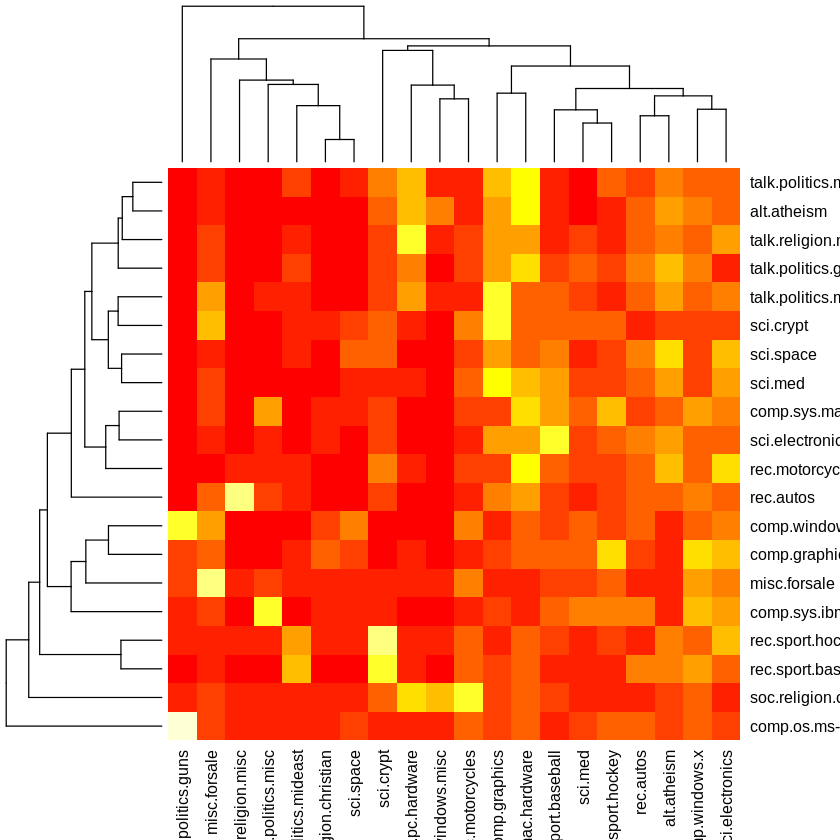

In [82]:
heatmap(final)

In [44]:
library(dplyr)
cluster_result_df <- as.data.frame(clustering_result)

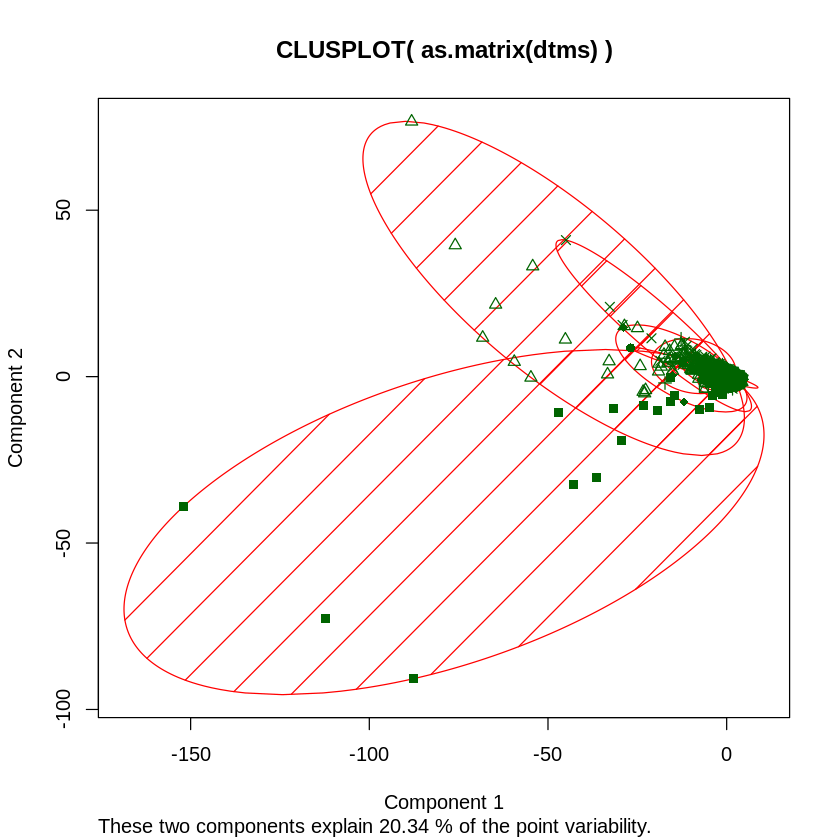

In [45]:
clusplot(as.matrix(dtms), kfit$cluster, color=T, shade=T, labels=0, lines=0)

In [ ]:
cluster_result_df <- as.data.frame(clustering_result)
counts <- matrix(,nrow = length(groups), ncol = k)

i <- 1
#for (group in unique(groups)) {
#    #print(group)
#    for (cluster in seq(k)) {
#        print( sum(cluster_result_df$clustering == cluster & cluster_result_df$groups == group) )
#    }
#    #i <- i + 1
#}